# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [76]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../Tarea 6/cities.csv"
# Read the file
output_data_file_df=pd.read_csv(output_data_file)

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [77]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [78]:
print("Beginning Data Retrieval")
print("-----------------------------")
for city in range(len(cities)):
    print(f"Processing Record {city} of Set 1  | {cities[city]}")

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1  | puerto ayora
Processing Record 1 of Set 1  | ribeira grande
Processing Record 2 of Set 1  | tuktoyaktuk
Processing Record 3 of Set 1  | vila franca do campo
Processing Record 4 of Set 1  | thompson
Processing Record 5 of Set 1  | belushya guba
Processing Record 6 of Set 1  | amderma
Processing Record 7 of Set 1  | jamestown
Processing Record 8 of Set 1  | sackville
Processing Record 9 of Set 1  | rikitea
Processing Record 10 of Set 1  | ushuaia
Processing Record 11 of Set 1  | albany
Processing Record 12 of Set 1  | mataura
Processing Record 13 of Set 1  | busselton
Processing Record 14 of Set 1  | isangel
Processing Record 15 of Set 1  | asau
Processing Record 16 of Set 1  | beringovskiy
Processing Record 17 of Set 1  | qaanaaq
Processing Record 18 of Set 1  | port alfred
Processing Record 19 of Set 1  | trairi
Processing Record 20 of Set 1  | benguela
Processing Record 21 of Set 1  | yellowknife
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [79]:
output_df=pd.DataFrame(output_data_file_df)
output_df.head()



,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [80]:
output_df.to_csv("../Tarea 6/Newdata.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

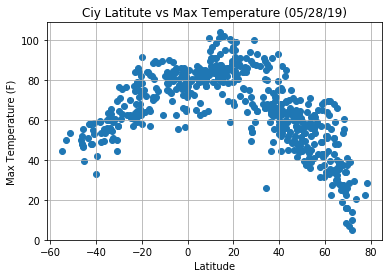

In [81]:
plt.scatter(output_df["Lat"], output_df["Max Temp"], marker="o")
plt.title("Ciy Latitute vs Max Temperature (05/28/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


In [82]:
plt.savefig("../Tarea 6/LatvsMaxTemp.png")

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

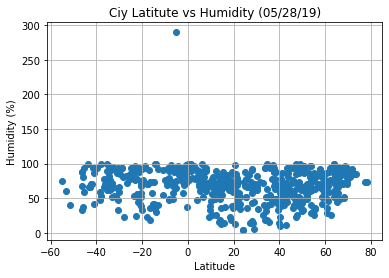

In [83]:
plt.scatter(output_df["Lat"], output_df["Humidity"], marker="o")
plt.title("Ciy Latitute vs Humidity (05/28/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

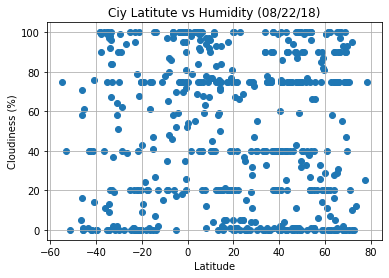

In [84]:
plt.scatter(output_df["Lat"], output_df["Cloudiness"], marker="o")
plt.title("Ciy Latitute vs Humidity (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

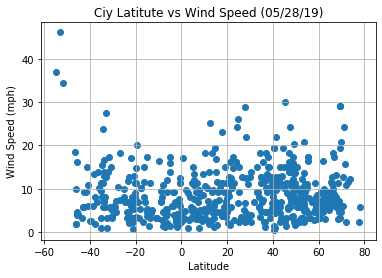

In [85]:
plt.scatter(output_df["Lat"], output_df["Wind Speed"], marker="o")
plt.title("Ciy Latitute vs Wind Speed (05/28/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [86]:
# OPTIONAL: Create a function to create Linear Regression plots


In [87]:
# Create Northern and Southern Hemisphere DataFrames
north_df=output_df.loc[(output_df["Lat"]>0),:]
south_df=output_df.loc[(output_df["Lat"]<0),:]




####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

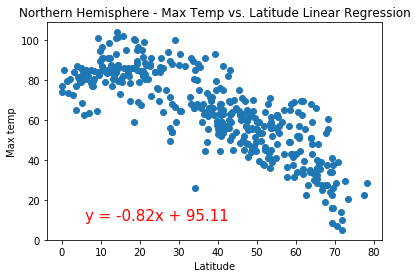

In [103]:
x_values=north_df["Lat"]
y_values=north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max temp")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

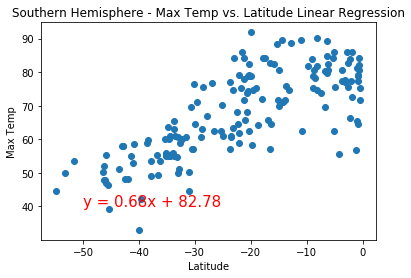

In [112]:
x_values=south_df["Lat"]
y_values=south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

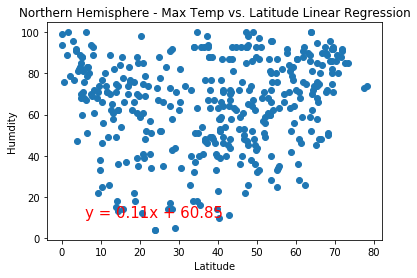

In [113]:
x_values=north_df["Lat"]
y_values=north_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

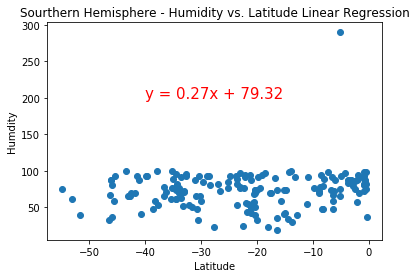

In [116]:
x_values=south_df["Lat"]
y_values=south_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Sourthern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humdity")
plt.annotate(line_eq,(-40,200),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

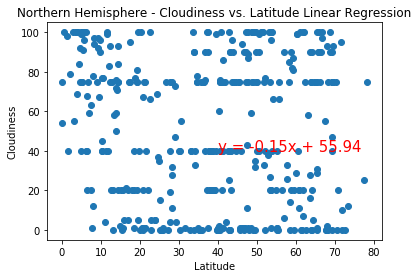

In [119]:
x_values=north_df["Lat"]
y_values=north_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

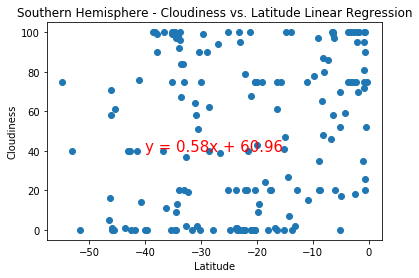

In [120]:
x_values=south_df["Lat"]
y_values=south_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

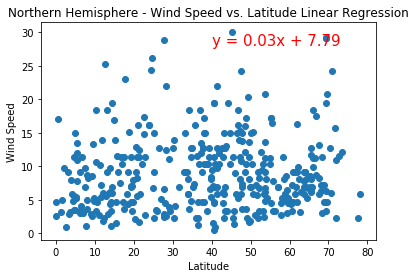

In [121]:
x_values=north_df["Lat"]
y_values=north_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(40,28),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

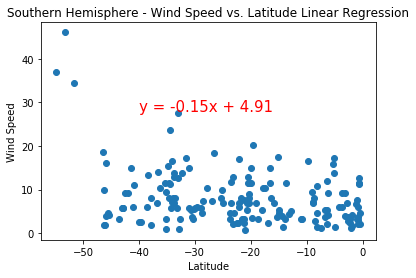

In [124]:
x_values=south_df["Lat"]
y_values=south_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values= x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-40,28),fontsize=15,color="red")
plt.show()